In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_context("poster")

dataset = pd.read_csv("adult.csv")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

In [ ]:
dataset.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
dataset.isnull().sum()
#checking for missing values

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
#Object in the case = Text
#Int64 = Numbers
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Text(0.5, 0, 'Workclass')

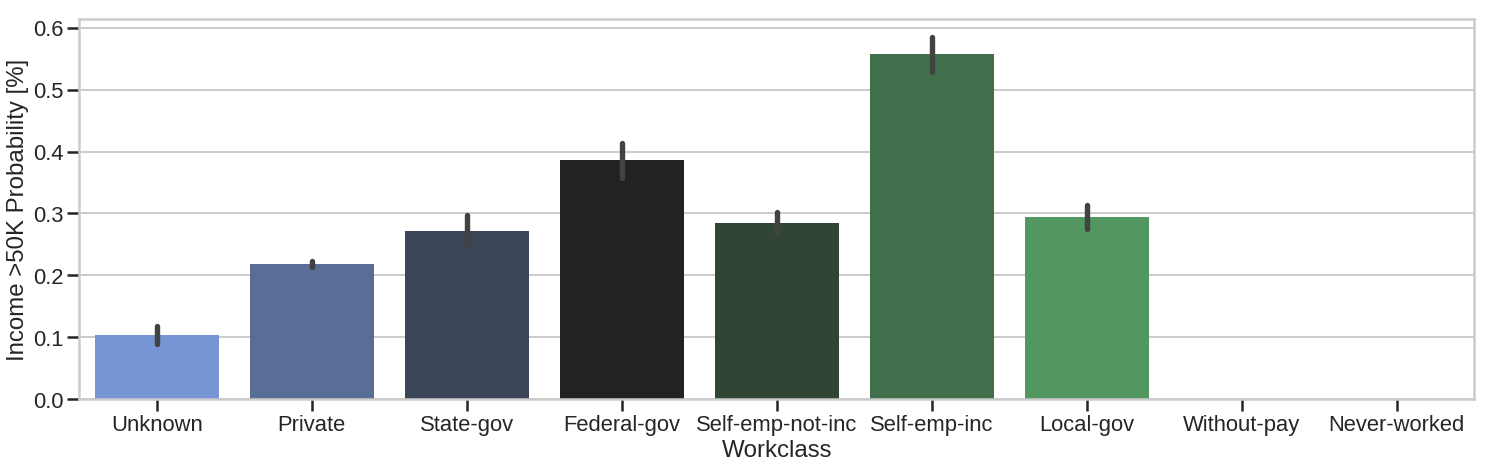

In [ ]:
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})
dataset["workclass"] = dataset["workclass"].replace(["?"],'Unknown')
fig, ax = plt.subplots(figsize=(25,7))
sns.set_context("poster")
current_palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark")

fig = sns.barplot(x='workclass',y='income',data=dataset,palette=current_palette)

fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Workclass")

Text(0.5, 0, 'Relationship')

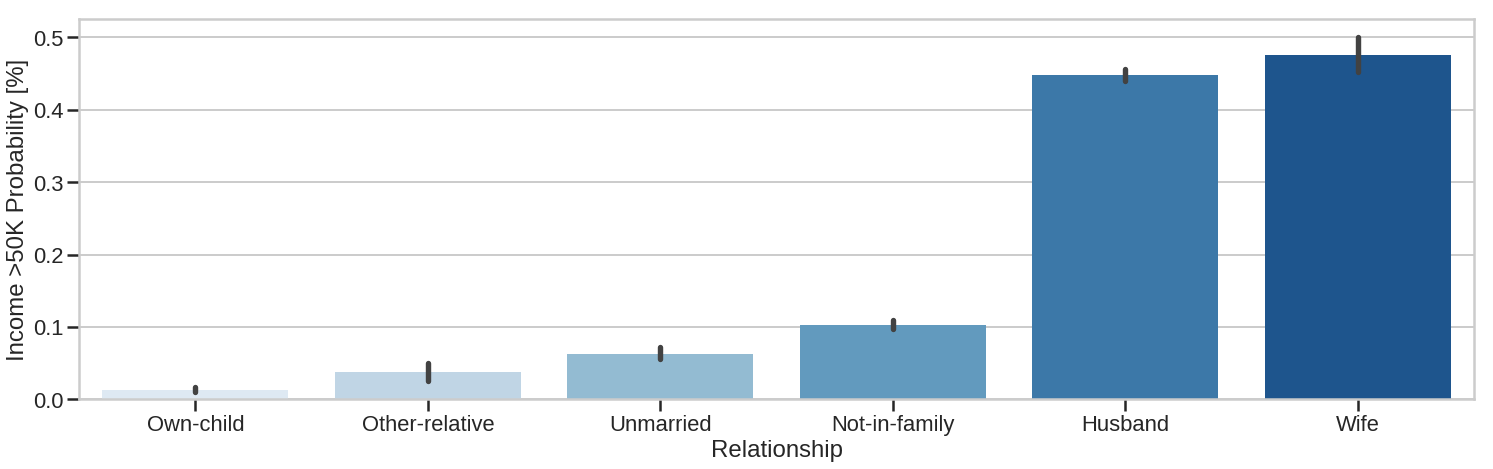

In [ ]:
fig, ax = plt.subplots(figsize=(25,7))
sns.set_context("poster")
current_palette = sns.color_palette("Blues")

fig = sns.barplot(x='relationship',y='income',data=dataset, order=['Own-child','Other-relative','Unmarried','Not-in-family','Husband','Wife'], palette=current_palette)

fig.set_ylabel("Income >50K Probability [%]")
fig.set_xlabel("Relationship")

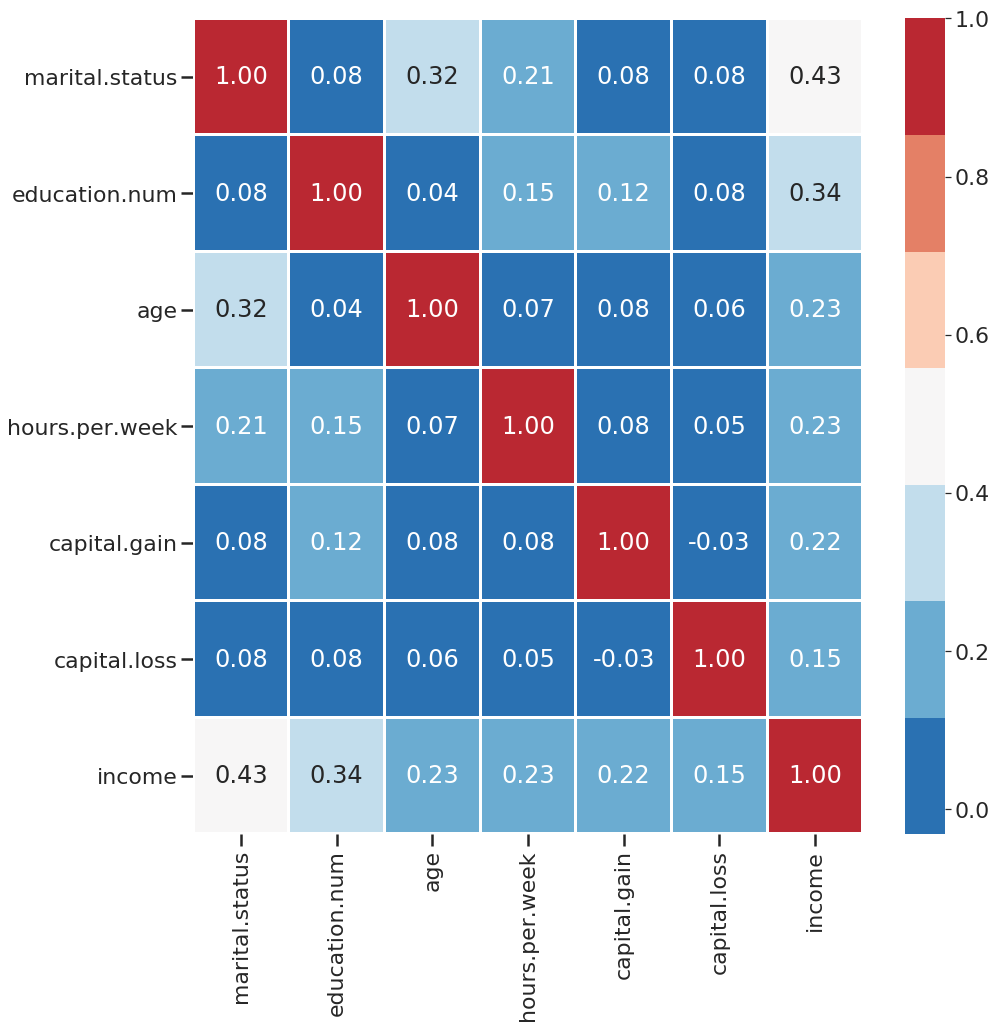

In [ ]:
numeric_columns = ['marital.status','education.num','age','hours.per.week','capital.gain','capital.loss','income']

fig, axe = plt.subplots(figsize=(15,15))
sns.set_context("poster")
sns.set(font_scale=2)
map1 = sns.color_palette("RdBu_r", 7)
sns.heatmap(datasetCopy[numeric_columns].corr(),annot=True, fmt='.2f',linewidths=2,cmap = map1)

<a id="4"></a> <br>
## 4. Modeling

In [ ]:
# drop any categorical data and convert the one's we want to keep into binary:: Yes (1) or No (0)
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].map({"Married":0, "Single":1})
dataset["marital.status"] = dataset["marital.status"]
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})
dataset.drop(labels=["sex","workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)

dataset.head(5)

,age,fnlwgt,education.num,marital.status,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,1,0,4356,40,0
1,82,132870,9,1,0,4356,18,0
2,66,186061,10,1,0,4356,40,0
3,54,140359,4,1,0,3900,40,0
4,41,264663,10,1,0,3900,40,0


In [ ]:
numeric_columns = ['marital.status','age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
X=dataset[numeric_columns]
Y=dataset.income
train_X, val_X, train_y, val_y = train_test_split(X,Y,test_size=0.21,random_state=0)

outcome = []
Modelnames = []
models = []
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=50, max_features=4)))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Logistic Regression', LogisticRegression(solver='lbfgs')))

kfoldCV = StratifiedKFold(n_splits=5, random_state=0)
xgb_model = XGBClassifier(n_estimators=250)
results = cross_val_score(xgb_model, train_X, train_y, cv=kfoldCV)
print("XGBClassifier: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
outcome.append(results)
Modelnames.append("XGBClassifier")

for name, model in models:
    kfoldCV = KFold(n_splits=5, random_state=0)
    cv_r = cross_val_score(model, train_X, train_y, cv=kfoldCV, scoring='accuracy')
    outcome.append(cv_r)
    Modelnames.append(name)
    print("%s: %.2f%% (%.2f%%)" % (name, cv_r.mean()*100, cv_r.std()*100))

XGBClassifier: 86.21% (0.50%)
Random Forest Classifier: 83.68% (0.48%)
Linear Discriminant Analysis: 83.10% (0.77%)
Decision Tree Classifier: 80.29% (0.59%)
Logistic Regression: 79.64% (0.67%)
